In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

In [18]:
Content = pd.read_csv("D:\\Depi\\accenture\\Content.csv")
Content

,Unnamed: 0,Content ID,Content Type,Category
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...,...
995,995,b4cef9ef-627b-41d7-a051-5961b0204ebb,video,public speaking
996,996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
997,997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


In [19]:
Reactions = pd.read_csv("D:\\Depi\\accenture\\Reactions.csv")
Reactions

,Unnamed: 0,Content ID,Reaction Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,4/22/2021 15:17
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/2020 9:43
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,6/17/2021 12:22
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,4/18/2021 5:13
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/2021 19:13
...,...,...,...,...
25548,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,6/27/2020 9:46
25549,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2/16/2021 17:17
25550,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,9/12/2020 3:54
25551,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,11/4/2020 20:08


In [20]:
ReactionTypes = pd.read_csv("D:\\Depi\\accenture\\ReactionTypes.csv")
ReactionTypes

,Unnamed: 0,Reaction Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [21]:
print(type(Content))  # Should return <class 'pandas.DataFrame'>


<class 'pandas.core.frame.DataFrame'>


## Data Cleaning

In [23]:
Content['Category'].value_counts()

technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: Category, 

- Some columns with quotations and some without

In [24]:
# Remove quotation marks from category names
Content['Category'] = Content['Category'].str.replace('"','', regex=False)

In [25]:
Content['Category'].value_counts()

technology         72
animals            68
travel             67
culture            66
science            64
food               62
healthy eating     61
cooking            61
soccer             61
fitness            61
tennis             59
dogs               58
education          57
studying           56
veganism           49
public speaking    49
Fitness             5
Animals             4
Science             4
Soccer              3
Food                2
Studying            2
Education           2
Travel              2
Technology          1
Culture             1
Healthy Eating      1
Veganism            1
Public Speaking     1
Name: Category, dtype: int64

### Saving cleaned dataset

In [26]:
save_path = "D:\\Depi\\accenture\\Cleaned_Content.csv"  
Content.to_csv(save_path, index=False)

### Drop Nulls

In [28]:
Reactions['Reaction Type'].isnull().sum()

980

In [29]:
Reactions = Reactions.dropna(subset=['Reaction Type']).reset_index(drop=True)

In [31]:
Reactions

,Unnamed: 0,Content ID,Reaction Type,Datetime
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/2020 9:43
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,6/17/2021 12:22
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,4/18/2021 5:13
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/2021 19:13
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,8/23/2020 12:25
...,...,...,...,...
24568,25548,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,6/27/2020 9:46
24569,25549,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2/16/2021 17:17
24570,25550,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,9/12/2020 3:54
24571,25551,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,11/4/2020 20:08


In [32]:
Reactions.isnull().sum()

Unnamed: 0       0
Content ID       0
Reaction Type    0
Datetime         0
dtype: int64

In [33]:
save_path = "D:\\Depi\\accenture\\Cleaned_Reactions.csv"  
Reactions.to_csv(save_path, index=False)

### Merge Tables

In [34]:
reactions = pd.read_csv("D:\\Depi\\accenture\\Cleaned_Reactions.csv")  
content = pd.read_csv("D:\\Depi\\accenture\\Cleaned_Content.csv")      
reaction_types = pd.read_csv("D:\\Depi\\accenture\\ReactionTypes.csv")

In [35]:
# Merge reactions with content data
merged_data = reactions.merge(content, on="Content ID", how="left")
# Merge with reaction types data
merged_data = merged_data.merge(reaction_types, on="Reaction Type", how="left")

In [36]:
merged_data.head()

,Unnamed: 0_x,Content ID,Reaction Type,Datetime,Unnamed: 0_y,Content Type,Category,Unnamed: 0,Sentiment,Score
0,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/2020 9:43,0,photo,Studying,2,negative,0
1,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,6/17/2021 12:22,0,photo,Studying,11,negative,10
2,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,4/18/2021 5:13,0,photo,Studying,14,negative,15
3,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/2021 19:13,0,photo,Studying,2,negative,0
4,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,8/23/2020 12:25,0,photo,Studying,4,positive,30


In [37]:
# Drop unneeded columns
merged_data = merged_data.drop(columns=["Unnamed: 0_x", "Unnamed: 0_y", "Unnamed: 0"], errors="ignore")

In [38]:
merged_data.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/2020 9:43,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,6/17/2021 12:22,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,4/18/2021 5:13,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/2021 19:13,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,8/23/2020 12:25,photo,Studying,positive,30


## Final Cleaned Dataset

In [39]:
merged_data = pd.read_csv("D:\\Depi\\accenture\\Task 3_Final Content Data set.csv")
merged_data

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/8/20 12:25,photo,studying,positive,30
...,...,...,...,...,...,...,...,...
24568,24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,27/6/20 9:46,audio,technology,negative,10
24569,24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,16/2/21 17:17,audio,technology,positive,45
24570,24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,12/9/20 3:54,audio,technology,positive,30
24571,24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,4/11/20 20:08,audio,technology,negative,12


### Top 5 Categories

In [40]:
# Calculate total scores per category
category_scores = merged_data.groupby("Category")["Score"].sum().reset_index()
# Get the top 5 categories
top_5_categories = category_scores.nlargest(5, "Score")
top_5_categories

,Category,Score
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676


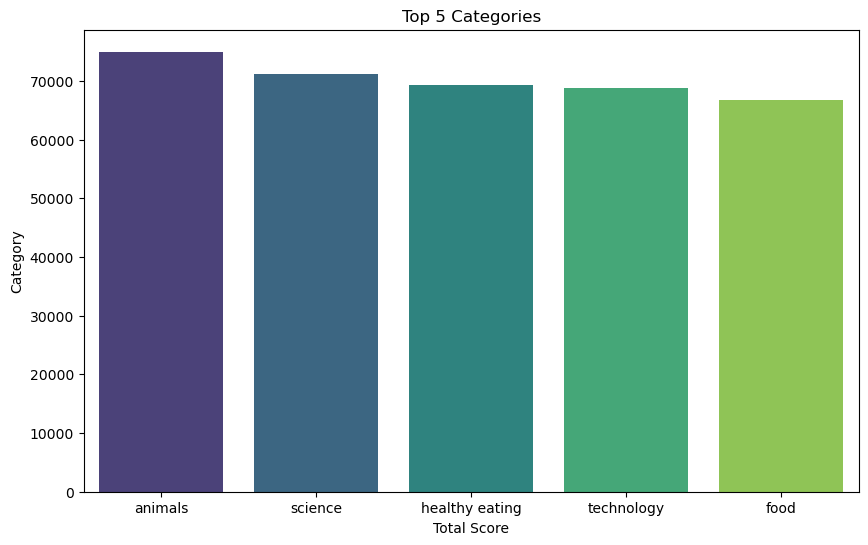

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_categories['Category'], y=top_5_categories['Score'], palette="viridis")
plt.xlabel("Total Score")
plt.ylabel("Category")
plt.title("Top 5 Categories")
plt.show()

### Number of unique categories

In [42]:
merged_data['Category'].nunique()

16

### Number of reactions of the most popular category

In [45]:
reactions_count = merged_data[merged_data["Category"] == 'animals']["Reaction Type"].count()
print('The number of reactions of the most popular category (animals):  ',reactions_count)

The number of reactions of the most popular category (animals):   1897


In [46]:
merged_data["Post Month"] = pd.to_datetime(merged_data["Datetime"]).dt.month
monthly_posts = merged_data["Post Month"].value_counts().sort_index()
monthly_posts

1     2142
2     1890
3     1982
4     1978
5     2110
6     2068
7     2116
8     2055
9     1991
10    2087
11    2055
12    2099
Name: Post Month, dtype: int64

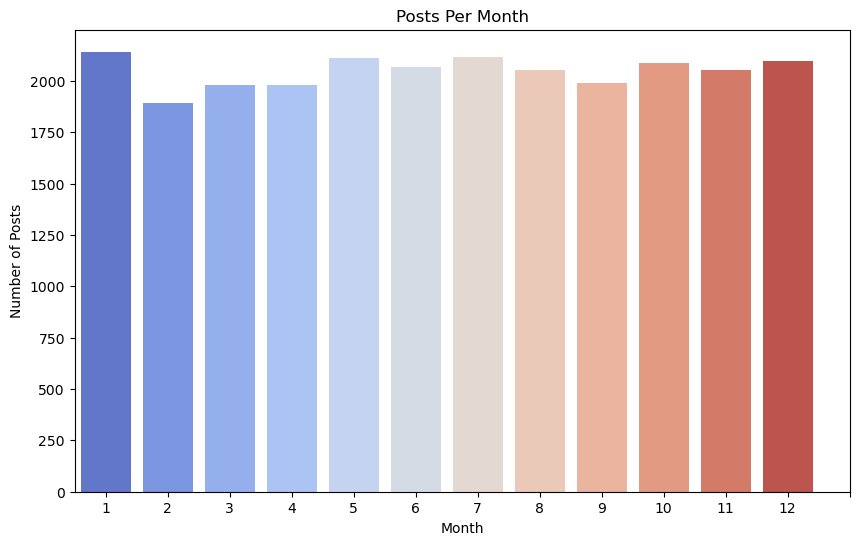

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_posts.index, y=monthly_posts.values, palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.title("Posts Per Month")
plt.xticks(range(0, 13))
plt.show()